# Omega Aragonite Statistical Plots

In [1]:
import xgcm
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import gridspec
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
from scipy import stats

In [2]:
%matplotlib inline

In [3]:
%reload_ext autoreload
%autoreload 2
from chazbpei2020.preprocessing import *

## Surface irr 0.1 W/m^2

---

## RCP85 Ensemble Average

In [4]:
# irr0.1 Omega Arag for RCP85 ensemble average (preprocessed)
directory = '~/chazbpei2020/data/processed/Omega_Arag/RCP85/'
filename = 'omega_arag_irr_0.1Wm2_ensAvg_1950_2100.nc'
oa_path = directory+filename
ds_oa_irr85 = xr.open_dataset(oa_path).rename({'XT_OCEAN': 'xt_ocean',
                                     'YT_OCEAN': 'yt_ocean',
                                     'TIME': 'time',
                                     'OMEGA_ARAG_IRR': 'omega_arag'})

In [5]:
# Get coordinates
lon = ds_oa_irr85.xt_ocean.data
lat = ds_oa_irr85.yt_ocean.data

## Calculate Time of Emergence for Omega Arag Undersaturation

In [6]:
# Compute dataset tallying undersaturated months

# for the entire dataset:
# if omega arag < 1, set point to 1
# otherwise, set point to 0
# Proceed by grouping by year and talling points
da_undersat85 = calc_undersat(ds_oa_irr85)

In [7]:
# Obtain time of emergence for different undersaturation frequencies
# occurs during x/12 months of the year
da_rcp85 = []
da_rcp85.append('placeholder')
for i in range(1,13):
    da_emerge = da_undersat85.year.where(da_undersat85 >= i).min(dim='year')
    da_rcp85.append(da_emerge)

/home/aos/chazb/miniconda3/envs/chazbpei2020/lib/python3.8/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


---

## RCP45 Ensemble Average

In [8]:
# irr0.1 Omega Arag for RCP45 ensemble average (preprocessed)
directory = '~/chazbpei2020/data/processed/Omega_Arag/RCP45/'
filename = 'omega_arag_irr_0.1Wm2_ensAvg_2006_2100.nc'
oa_path = directory+filename
ds_oa_irr45 = xr.open_dataset(oa_path).rename({'XT_OCEAN': 'xt_ocean',
                                     'YT_OCEAN': 'yt_ocean',
                                     'TIME': 'time',
                                     'OMEGA_ARAG_IRR': 'omega_arag'})

## Calculate Time of Emergence for Omega Arag Undersaturation

In [9]:
# Compute dataset tallying undersaturated months
da_undersat45 = calc_undersat(ds_oa_irr45)

In [10]:
# Obtain time of emergence for different undersaturation frequencies
# occurs during x/12 months of the year
da_rcp45 = []
da_rcp45.append('placeholder')
for i in range(1,13):
    da_emerge = da_undersat45.year.where(da_undersat45 >= i).min(dim='year')
    da_rcp45.append(da_emerge)

/home/aos/chazb/miniconda3/envs/chazbpei2020/lib/python3.8/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


---

## RCP26 Ensemble Average

In [11]:
# irr0.1 Omega Arag for RCP26 ensemble average (preprocessed)
directory = '~/chazbpei2020/data/processed/Omega_Arag/RCP26/'
filename = 'omega_arag_irr_0.1Wm2_ensAvg_2006_2100.nc'
oa_path = directory+filename
ds_oa_irr26 = xr.open_dataset(oa_path).rename({'XT_OCEAN': 'xt_ocean',
                                     'YT_OCEAN': 'yt_ocean',
                                     'TIME': 'time',
                                     'OMEGA_ARAG_IRR': 'omega_arag'})

## Calculate Time of Emergence for Omega Arag Undersaturation

In [12]:
# Compute dataset tallying undersaturated months
da_undersat26 = calc_undersat(ds_oa_irr26)

In [13]:
# Obtain time of emergence for different undersaturation frequencies
# occurs during x/12 months of the year
da_rcp26 = []
da_rcp26.append('placeholder')
for i in range(1,13):
    da_emerge = da_undersat26.year.where(da_undersat26 >= i).min(dim='year')
    da_rcp26.append(da_emerge)

/home/aos/chazb/miniconda3/envs/chazbpei2020/lib/python3.8/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


---

## Possible Calcualtion Solutions

In [14]:
# Possible efficiency solutions

# Slice along 1D array in time dimension

# numpy array with unfunc mapping

# create 3D time array
# time where (omega arag < 1).drop=True min(dim=time)
# find min of time array

---

## Plot Time of Emergence

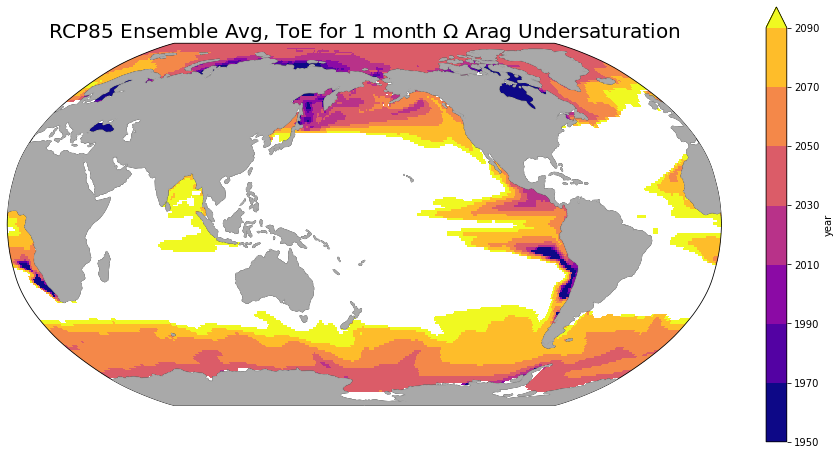

In [15]:
# Plot time of emergence for Omega Aragonite undersaturation (1 m/yr)
crs = ccrs.Robinson(central_longitude=180)
src=ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=[16,8],
                               subplot_kw={'projection':crs})

clevs = np.arange(1950, 2101, 20)
da_rcp85[1].plot(ax=ax, levels=clevs, cmap='plasma',
                  transform=src, robust=True)
ax.set_title('RCP85 Ensemble Avg, ToE for 1 month $\Omega$ Arag Undersaturation',
            fontsize=20)
ax.coastlines()
ax.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')

fig.savefig("oa_emergence_figs/oa_emergence_plot")

## Contour Plots

/home/aos/chazb/miniconda3/envs/chazbpei2020/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'robust'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


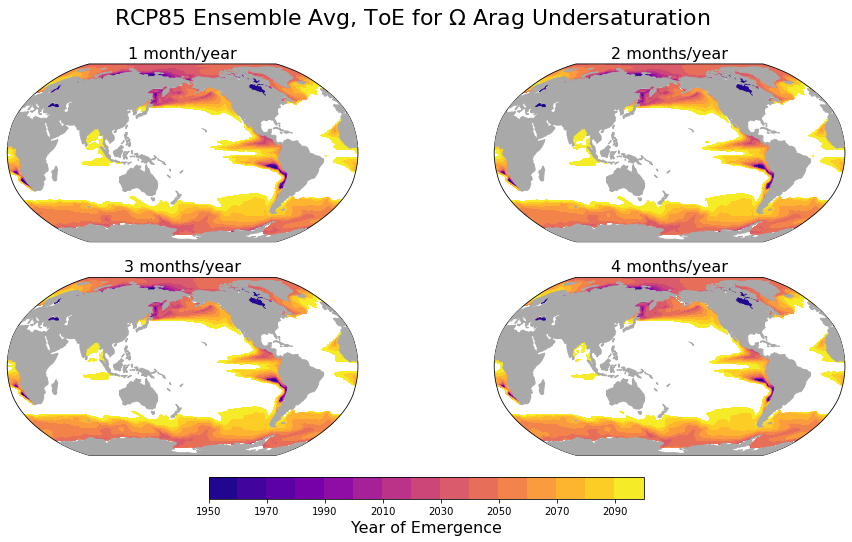

In [16]:
# Plot time of emergence for Omega Aragonite undersaturation 1-4 months/year
nrows=2
ncols=2
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=[16,8],
                               subplot_kw={'projection':crs})

contour_emergence(da_rcp85[1], 1, axs[0,0])
contour_emergence(da_rcp85[2], 2, axs[0,1])
contour_emergence(da_rcp85[3], 3, axs[1,0])
contour_emergence(da_rcp85[4], 4, axs[1,1])

fig.suptitle('RCP85 Ensemble Avg, ToE for $\Omega$ Arag Undersaturation',
            fontsize=22)

fig.savefig("oa_emergence_figs/oa_emergence_plot_1234")

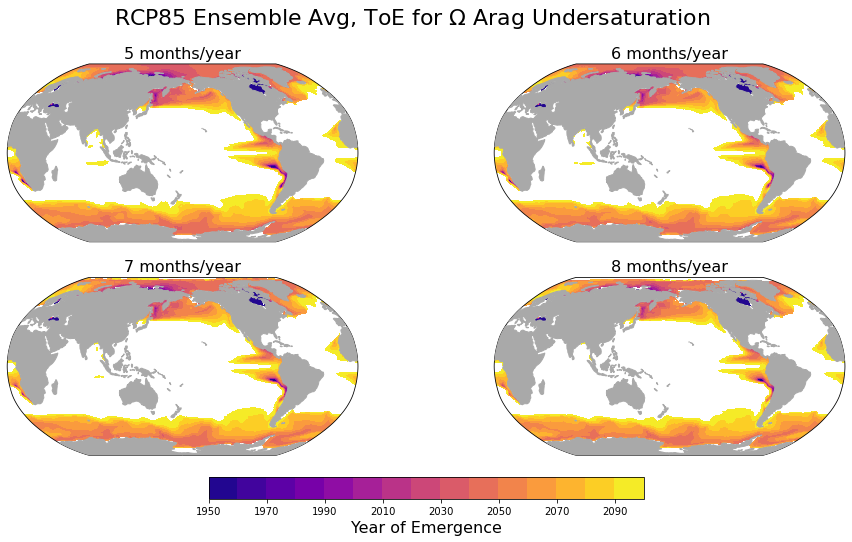

In [17]:
# Plot time of emergence for Omega Aragonite undersaturation 5-8 months/year
nrows=2
ncols=2
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=[16,8],
                               subplot_kw={'projection':crs})

contour_emergence(da_rcp85[5], 5, axs[0,0])
contour_emergence(da_rcp85[6], 6, axs[0,1])
contour_emergence(da_rcp85[7], 7, axs[1,0])
contour_emergence(da_rcp85[8], 8, axs[1,1])

fig.suptitle('RCP85 Ensemble Avg, ToE for $\Omega$ Arag Undersaturation',
            fontsize=22)

fig.savefig("oa_emergence_figs/oa_emergence_plot_5678")

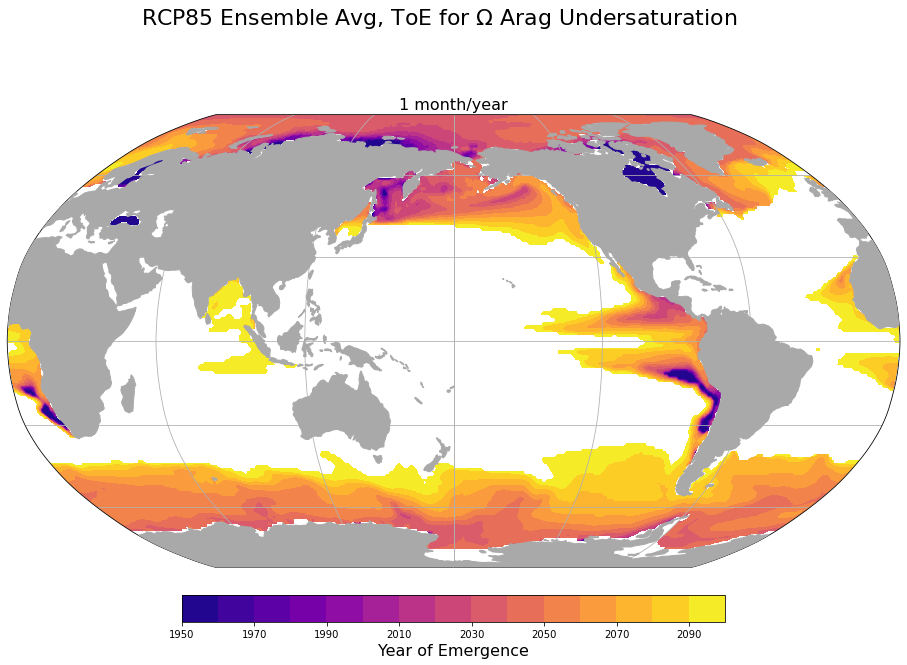

In [18]:
# Plot time of emergence for Omega Aragonite undersaturation
fig, axs = plt.subplots(figsize=[16,10], nrows=1,
                               subplot_kw={'projection':crs})

contour_emergence(da_rcp85[1], 1, axs)
axs.gridlines()
fig.suptitle('RCP85 Ensemble Avg, ToE for $\Omega$ Arag Undersaturation',
            fontsize=22)
fig.savefig("oa_emergence_figs/oa_emergence_plot")

---

## Comparing Different Ensembles

In [19]:
# Predefine strings for simulation names
rcp85 = 'RCP85'
rcp45 = 'RCP45'
rcp26 = 'RCP26'

## Time of Emergence for Ensemble Means

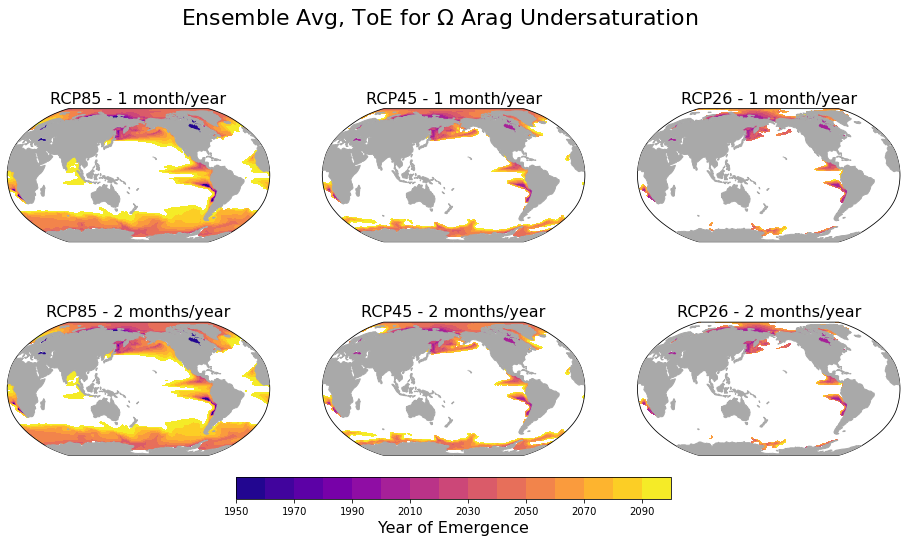

In [20]:
# Plot time of emergence for Omega Aragonite undersaturation
nrows=2
ncols=3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=[16,8],
                               subplot_kw={'projection':crs})

contour_emergence(da_rcp85[1], 1, axs[0,0], rcp85)
contour_emergence(da_rcp85[2], 2, axs[1,0], rcp85) 
contour_emergence(da_rcp45[1], 1, axs[0,1], rcp45)
contour_emergence(da_rcp45[2], 2, axs[1,1], rcp45)
contour_emergence(da_rcp26[1], 1, axs[0,2], rcp26)
contour_emergence(da_rcp26[2], 2, axs[1,2], rcp26)

fig.suptitle('Ensemble Avg, ToE for $\Omega$ Arag Undersaturation',
            fontsize=22)

fig.savefig("oa_emergence_figs/oa_emergence_plot_comp")

In [21]:
# Calculate duration of Transition from 1 month to 6 months per year undersaturated
da_rcp85_transition = da_rcp85[6].fillna(0) - da_rcp85[1].fillna(0)
da_rcp45_transition = da_rcp45[6].fillna(0) - da_rcp45[1].fillna(0)
da_rcp26_transition = da_rcp26[6].fillna(0) - da_rcp26[1].fillna(0)

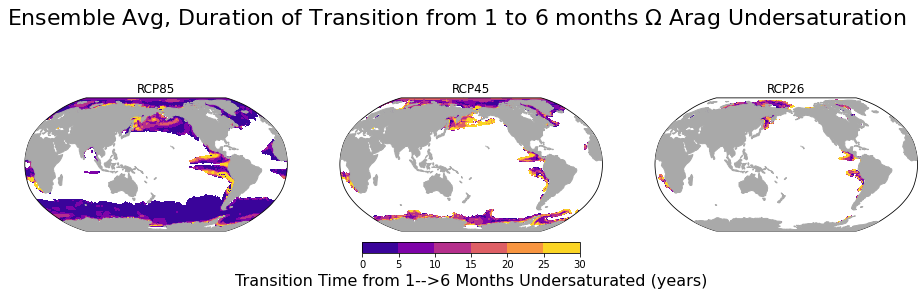

In [22]:
# Plot time of emergence for Omega Aragonite undersaturation
nrows=1
ncols=3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=[16,4],
                               subplot_kw={'projection':crs})

contour_transition(da_rcp85_transition, axs[0], rcp85)
contour_transition(da_rcp45_transition, axs[1], rcp45)
contour_transition(da_rcp26_transition, axs[2], rcp26)

fig.suptitle('Ensemble Avg, Duration of Transition from 1 to 6 months $\Omega$ Arag Undersaturation',
            fontsize=22)

fig.savefig("oa_emergence_figs/oa_transition_plot")

## Spatial Frequency Statistical Plots

In [23]:
# Plot Spatial frequency for Omega Arag Undersaturation (RCP85)
omega_arag = ds_oa_irr85.omega_arag.squeeze()
# Filter out nan points (above threshold) and replace with 0
da_oa_under = omega_arag.where(omega_arag <= 1.0).fillna(0)
# Replace Omega Arag points below threshold with value 1 
# (tally undersaturated months)
da_oa_under = da_oa_under.where(da_oa_under == 0).fillna(1)

In [24]:
# Calculate cell count / frequency of undersaturation for each year
years = 151
freq = []
for yr in range(years):
    cellcount = int(da_oa_under[yr*12].where(da_oa_under[yr*12] == 1).sum().data)
    freq.append(cellcount)

for i in range(len(freq)):
    freq[i] = freq[i]/(360*180)

Text(0.5, 1.0, 'RCP85 Ensemble Average, Spatial Frequency for Undersaturated')

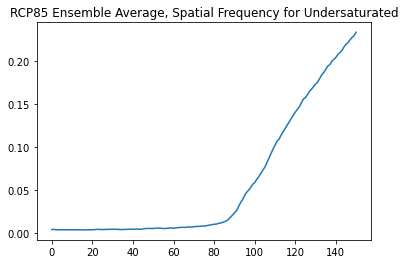

In [25]:
fig, ax = plt.subplots(figsize=[6,4])

ax.plot(freq)
ax.set_title('RCP85 Ensemble Average, Spatial Frequency for Undersaturated')

---